Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.3  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić  

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **4. studenog 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [79]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Ivan Bucic\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['exp', 'trace']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [80]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [81]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

[2.1] [[-0.5 -0.1]]

Accuracy score: 1.0


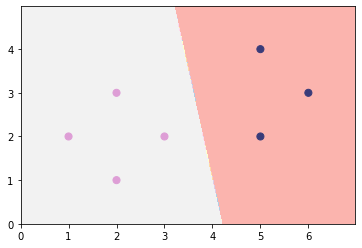

In [82]:
ridgeClassifier = RidgeClassifier(alpha=0)
ridgeClassifier.fit(seven_X, seven_y)
print (ridgeClassifier.intercept_, ridgeClassifier.coef_)
print("")

accurecy_score = accuracy_score(seven_y, ridgeClassifier.predict(seven_X))

print ("Accuracy score: " + str(accurecy_score))

hx = ridgeClassifier.predict
mlutils.plot_2d_clf_problem(seven_X, seven_y, h=hx)

In [83]:
def ridge_classifier(index, X, y):
    ridgeClassifier = RidgeClassifier(alpha=index)
    ridgeClassifier.fit(X, y)
    
    accurecy_score = accuracy_score(y, ridgeClassifier.predict(X))
    print ("Accuracy score: " + str(accurecy_score))
    
    hx = ridgeClassifier.predict
    mlutils.plot_2d_clf_problem(X, y, h=hx)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

Accuracy score: 1.0


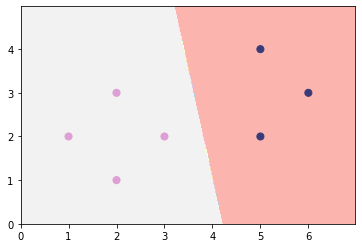

In [84]:
linearRegression = LinearRegression()
linearRegression.fit(seven_X, seven_y)
#print (linearRegression.intercept_, linearRegression.coef_)
#print("")

accurecy_score = accuracy_score(seven_y, linearRegression.predict(seven_X) >= 0.5)

print ("Accuracy score: " + str(accurecy_score))

hx = lambda x : linearRegression.predict(x) >= 0.5
mlutils.plot_2d_clf_problem(seven_X, seven_y, h=hx)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [85]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Accuracy score: 0.875


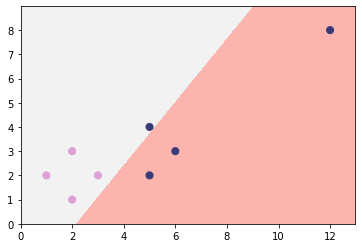

In [86]:
ridge_classifier(0, outlier_X, outlier_y)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [87]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Accuracy score: 0.875


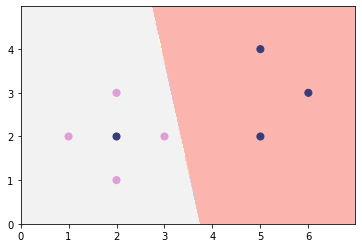

In [88]:
ridge_classifier(0, unsep_X, unsep_y)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

In [89]:
from sklearn.datasets import make_classification

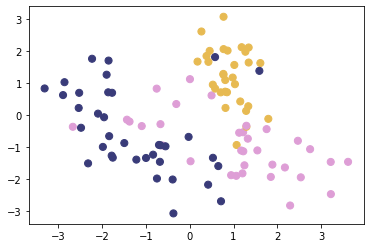

In [90]:
X, y = make_classification(n_features=2, n_classes=3, n_redundant=0, n_clusters_per_class=1)

mlutils.plot_2d_clf_problem(X, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

In [91]:
def one_vs_rest(name, X, y):
    y_name = y.copy()
    
    if name == 'blue':
        y_name[y_name == 0] = 3
        y_name[y_name == 1] = 0
        y_name[y_name == 2] = 0
        y_name[y_name == 3] = 1
    elif name == 'yellow':
        y_name[y_name == 2] = 0
    elif name == 'pink':
        y_name[y_name == 1] = 0
        y_name[y_name == 2] = 1 
    
    linearRegression = LinearRegression()
    linearRegression.fit(X, y_name)
    hx = lambda x : linearRegression.predict(x) >= 0.5
    mlutils.plot_2d_clf_problem(X, y, h=hx)
    
    return linearRegression

Blue vs. rest


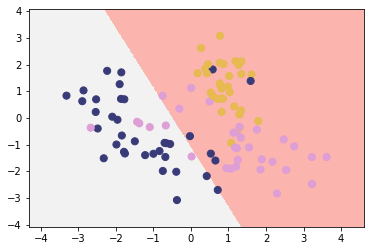

In [92]:
# Blue
print("Blue vs. rest")
linearRegression_blue = one_vs_rest('blue', X, y)

Yellow vs. rest


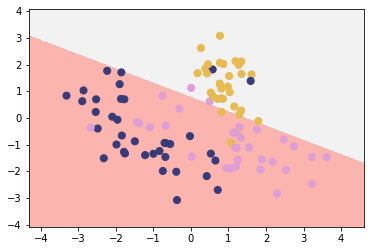

In [93]:
# Yellow
print("Yellow vs. rest")
linearRegression_yellow = one_vs_rest('yellow', X, y)

Pink vs. rest


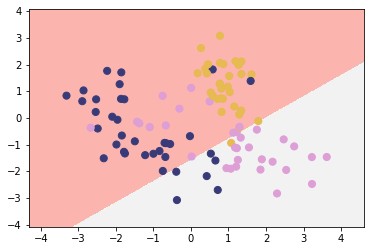

In [94]:
# Pink
print("Pink vs. rest")
linearRegression_pink = one_vs_rest('pink', X, y)

In [95]:
def predict(x):
    predictH_blue = linearRegression_blue.predict([x])
    predictH_yellow = linearRegression_yellow.predict([x])
    predictH_pink = linearRegression_pink.predict([x])
    
    if (predictH_blue > predictH_yellow and predictH_blue > predictH_pink):
        y = 0
    elif (predictH_yellow > predictH_blue and predictH_yellow > predictH_pink):
        y = 1
    elif (predictH_pink > predictH_blue and predictH_pink > predictH_yellow):
        y = 2
    return y

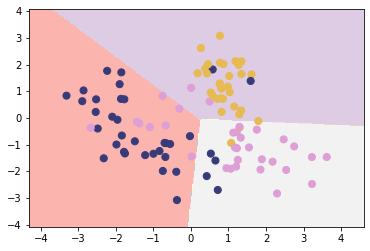

In [96]:
hx_predict = lambda x : predict(x)
mlutils.plot_2d_clf_problem(X, y, h=hx_predict)

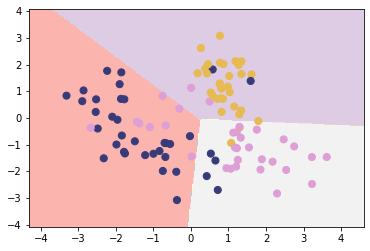

In [97]:
ridgeClassifier.fit(X,y)
hx_ridgePredict = lambda x : ridgeClassifier.predict(x)
mlutils.plot_2d_clf_problem(X, y, h=hx_ridgePredict)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

In [98]:
from math import exp

def sigma(x, alpha=1):
    return 1/(1+exp(-alpha*x))

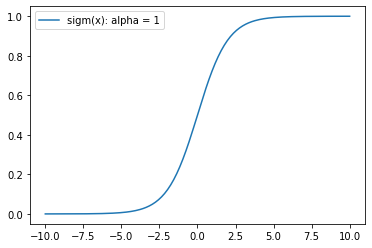

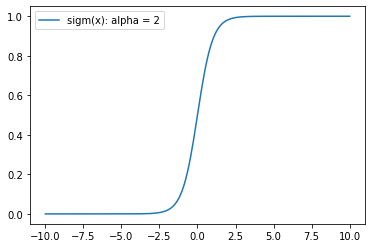

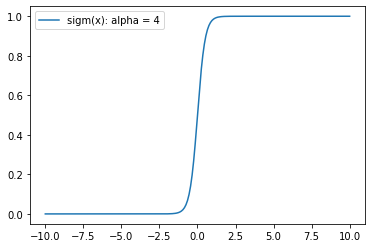

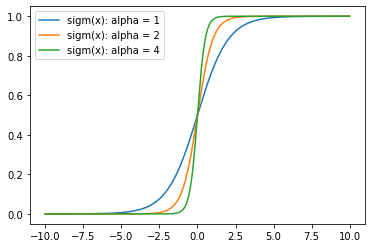

In [99]:
alpha = [1, 2, 4]
X = []
y = []

for a in alpha:
    for x in np.linspace(-10, 10, 200):
        X.append(x)
        y.append(sigma(x, alpha=a))
        
    plt.plot(X, y, label='sigm(x): alpha = ' + str(a))
    plt.legend(loc='upper left')
    plt.show()
    
    X.clear()
    y.clear()

for a in alpha:
    X = []
    y = []
    for x in np.linspace(-10, 10, 200):
        X.append(x)
        y.append(sigma(x, alpha=a))
        
    plt.plot(X, y, label='sigm(x): alpha = ' + str(a))
plt.legend(loc='upper left')
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [100]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures

def lr_h(x, w):
    #phi = np.insert(x, 0, 1)
    #w_x = dot(w.T, phi)
    #return sigma(w_x)
    return sigma(dot(w.T, np.insert(x, 0, 1)))


def cross_entropy_error(X, y, w): 
    sum = 0
    for i, x in enumerate(X):
        sum += -y[i] * np.log(lr_h(x, w)) - (1 - y[i]) * np.log(1 - lr_h(x, w))
        #sum += -(0.5 * y[i] + 0.5) * np.log(lr_h(x, w)) - (0.5 * y[i] - 0.5) * np.log(1 - lr_h(x, w))
    return sum/len(y)
    
def poly_feature(X, index):
    polynomialFeature = PolynomialFeatures(index)
    phi = polynomialFeature.fit_transform(X)
    return phi

def zero_list(index):
    return [0] * len(index)

def calculate_weights(weights, errorGradient, eta, alpha):
    weights[0] -= eta * errorGradient[0]
    weights[1:] = weights[1:] * (1 - eta * alpha) - eta * errorGradient[1:]

def matrix_trace(trace, traceMatrix, weights):
    if (trace):
        traceMatrix.append(weights.copy())

def lr_train(X, y, eta=0.01, max_iter=2000, trace=False, alpha=0, epsilon=0.000001):
    n = X.shape[1]
    m = X.shape[0]
    
    y_train = y.copy()
    y_train[y_train == -1] = 0
    
    traceMatrix = []
    weights = zeros(len(X[0]) + 1)
    matrix_trace(trace, traceMatrix, weights)
    
    for i in range(max_iter):
        lastCEE = cross_entropy_error(X, y_train, weights)
        
        phi = poly_feature(X, 1)
        errorGradient = zero_list(weights)
        
        for i in range(len(phi)):
            h = lr_h(X[i], weights)
            errorGradient += (h - y[i]) * phi[i]

        calculate_weights(weights, errorGradient, eta, alpha)
        
        matrix_trace(trace, traceMatrix, weights)

        currentCEE = cross_entropy_error(X, y_train, weights)
        
        if (abs(currentCEE - lastCEE) < epsilon):
            break
            
    if (trace):
        return weights, traceMatrix
    else:
        return weights

#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

Cross entropy error:0.07751718252492555

[ 6.44150959 -2.11012128  0.53522851]


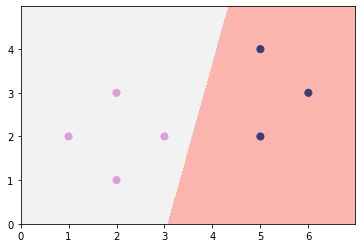

In [101]:
w = lr_train(seven_X, seven_y)

print("Cross entropy error:" + str(cross_entropy_error(seven_X, seven_y, w)))
print("")
print (w)

#w_trace, matrix_trace = lr_train(seven_X, seven_y, trace=True)
#print(matrix_trace)

predict = lambda x: lr_h(x, w) >= 0.5
mlutils.plot_2d_clf_problem(seven_X, seven_y, h = predict)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

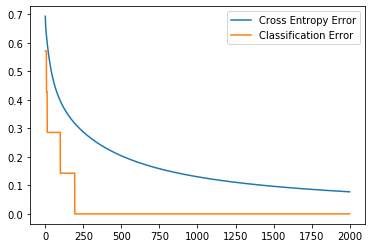

In [102]:
w, trace = lr_train(seven_X, seven_y, trace=True)

CEE = list()
CE = list()

for i in trace:
    CEE.append(cross_entropy_error(seven_X, seven_y, i))
    
    error = 0
    for x, y in zip(seven_X, seven_y):
        h = lr_h(x, i)
        h = 1 if h > 0.5 else 0
            
        if y != h:
            error += 1
    
    error /= len(seven_y)
    CE.append(error)
    
plt.plot(range(len(trace)), CEE, label="Cross Entropy Error")
plt.plot(range(len(trace)), CE, label="Classification Error")
plt.legend(loc="upper right")
plt.show()

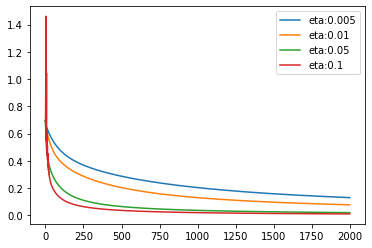

In [103]:
eta = [0.005, 0.01, 0.05, 0.1]

for n in eta:
    w, trace = lr_train(seven_X, seven_y, eta=n, trace=True)
    
    CEE = list()
    for j in trace:
        CEE.append(cross_entropy_error(seven_X, seven_y, j))
        
    plt.plot(range(len(trace)), CEE, label="eta:" + str(n))

plt.legend(loc="upper right")
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

In [104]:
from sklearn.linear_model import LogisticRegression

Accuracy score: 1.0


C:\Users\Ivan Bucic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


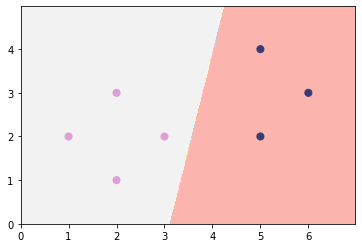

In [105]:
LR = LogisticRegression(tol = 0.0001, max_iter = 2000, C = 35)
LRModel = LR.fit(seven_X, seven_y)

accurecy_score = accuracy_score(seven_y, LR.predict(seven_X))
print ("Accuracy score: " + str(accurecy_score))

LRpredict = lambda x: LRModel.predict(x) >= 0.5
mlutils.plot_2d_clf_problem(seven_X, seven_y, h = LRpredict)

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

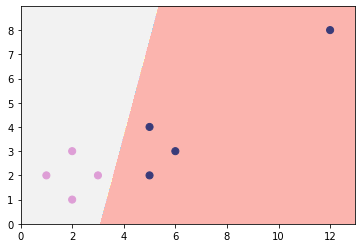

In [106]:
w4 = lr_train(outlier_X, outlier_y)

h4 = lambda x: lr_h(x, w4) >= 0.5
mlutils.plot_2d_clf_problem(outlier_X, outlier_y, h=h4)

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


In [107]:
def hw_graf(w, trace, X, num_w):
    h = [[],[],[],[],[],[],[],[]]
    w = [[],[],[]]
    
    for n in trace:
        for i, x in enumerate(X):
            h[i].append(lr_h(x,n))

    for n in trace4:
        for i in range(num_w):
            w[i].append(n[i])
    
    return h, w

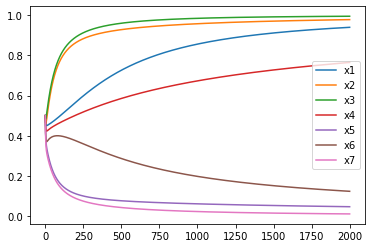

In [108]:
w4, trace4 = lr_train(seven_X, seven_y, trace=True)
num_h = 7

h, w = hw_graf(w4, trace4, seven_X, 3)
        
for i in range(num_h):
    plt.plot(range(len(trace4)), h[i], label="x" + str(i + 1))
plt.legend(loc="center right")
plt.show()

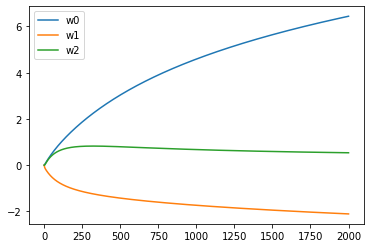

In [109]:
num_w = 3

h, w = hw_graf(w4, trace4, seven_X, 3)
        
for i in range(num_w):
    plt.plot(range(len(trace4)), w[i], label="w" + str(i))
plt.legend(loc="upper left")
plt.show()

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

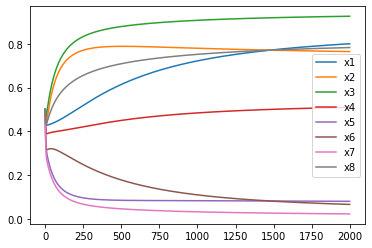

In [110]:
w4, trace4 = lr_train(unsep_X, unsep_y, trace=True)
num_h = 8

h, w = hw_graf(w4, trace4, unsep_X, 3)
        
for i in range(num_h):
    plt.plot(range(len(trace4)), h[i], label="x" + str(i + 1))
plt.legend(loc="center right")
plt.show()

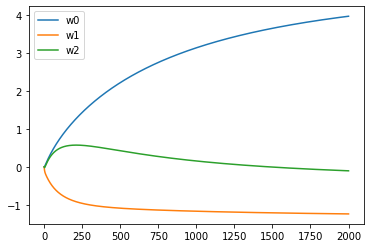

In [111]:
num_w = 3

h, w = hw_graf(w4, trace4, unsep_X, 3)
        
for i in range(num_w):
    plt.plot(range(len(trace4)), w[i], label="w" + str(i))
plt.legend(loc="upper left")
plt.show()

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [112]:
from numpy.linalg import norm

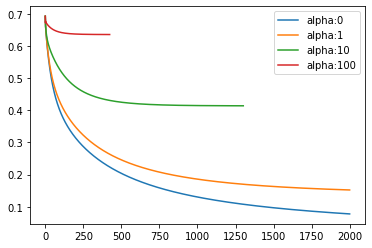

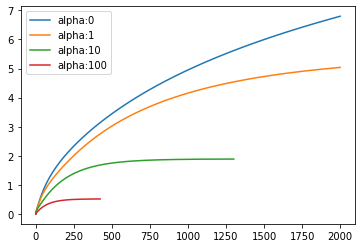

In [113]:
alpha = [0, 1, 10, 100]

for a in alpha:
    w, trace = lr_train(seven_X, seven_y, alpha=a, trace=True)
    CEE = list()
    for weight in trace:
        CEE.append(cross_entropy_error(seven_X, seven_y, weight))
    plt.plot(range(len(trace)), CEE, label="alpha:" + str(a))
plt.legend(loc="upper right")
plt.show()


for a in alpha:
    w, trace = lr_train(seven_X, seven_y, alpha=a, trace=True)
    norms = list()
    for weight in trace:
        norms.append(norm(weight))
    plt.plot(range(len(trace)), norms, label="alpha:" + str(a))
plt.legend(loc="upper left")
plt.show()

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [114]:
from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(2)
#...
#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

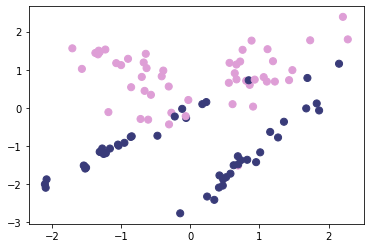

In [115]:
def log_model(index, X, y):
    polynomialFeature = PolynomialFeatures(index)
    phi = polynomialFeature.fit_transform(X)
    logisticRegression = LogisticRegression(C=10)
    model = logisticRegression.fit(phi, y)
    
    hx = lambda x : model.predict(polynomialFeature.transform(x))
    mlutils.plot_2d_clf_problem(X, y, h=hx)


X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)
mlutils.plot_2d_clf_problem(X, y)

d = 2


C:\Users\Ivan Bucic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


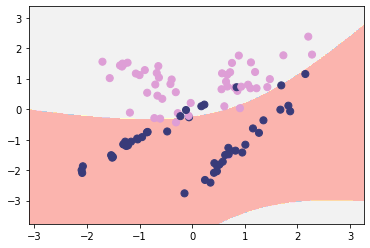

In [116]:
# d = 2
print("d = 2")
log_model(2, X, y)

d = 3


C:\Users\Ivan Bucic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


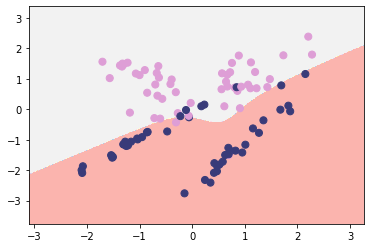

In [117]:
# d = 3
print("d = 3")
log_model(3, X, y)

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?